In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Lenet-5 实例 论文中为灰度图 在我们的实验中使用彩色图 有三个通道

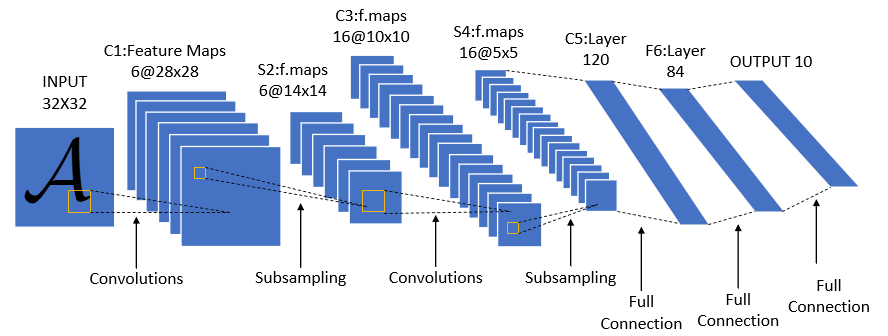

在pytorch中 Tensor的通道排序为（batch,channel,height,width）

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool1 = nn.MaxPool2d(2, 2)    #下采样层
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.relu(self.conv1(x))    # input(3, 32, 32) output(16, 28, 28) 使用了16个卷积核生成的channel也是16
        x = self.pool1(x)            # output(16, 14, 14)
        x = F.relu(self.conv2(x))    # output(32, 10, 10)
        x = self.pool2(x)            # output(32, 5, 5)
        x = x.view(-1, 32*5*5)       # output(32*5*5)
        x = F.relu(self.fc1(x))      # output(120)
        x = F.relu(self.fc2(x))      # output(84)
        x = self.fc3(x)              # output(10)
        return x

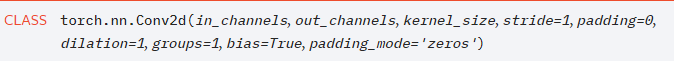

输出的size尺寸：
N = (W - F + 2P)/S + 1
1.输入图像的大小为W * W 
2.卷积核的尺寸为F*F
3.步长为S
4.padding的像素数为P

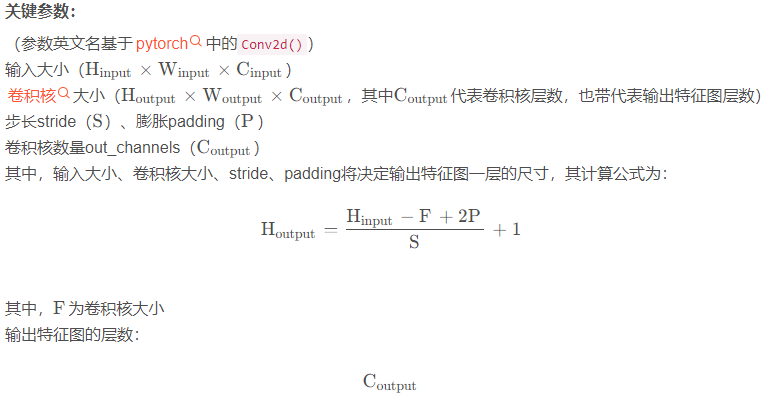